In [1]:
# Import API key
weather_api_key="d0cb7612d8e4acdc7e895ce9b00e46a3"

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
output_data_file ="C:/Users/User/Api Homework/Cities.csv"

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)

lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

382

In [6]:
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = weather_api_key


query_url = f"{url}appid={key}&units={units}&q="

response = requests.get(query_url + city).json()
response

{'coord': {'lon': 122.53, 'lat': -4.94},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 79.16,
  'feels_like': 88.84,
  'temp_min': 79.16,
  'temp_max': 79.16,
  'pressure': 1010,
  'humidity': 85,
  'sea_level': 1010,
  'grnd_level': 1000},
 'wind': {'speed': 0.43, 'deg': 37},
 'clouds': {'all': 100},
 'dt': 1585610289,
 'sys': {'country': 'ID', 'sunrise': 1585605120, 'sunset': 1585648546},
 'timezone': 28800,
 'id': 1640972,
 'name': 'Katobu',
 'cod': 200}

In [7]:
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        id = response['id']
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print (f"{city} ID: {id} has been pulled from Open Weather Map")
    except (KeyError, IndexError):
        country.append(None)
        date.append(None)
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        print(f"{city} not found, going to keep going!")

mandalgovi ID: 2030065 has been pulled from Open Weather Map
hilo ID: 5855927 has been pulled from Open Weather Map
nanortalik ID: 3421765 has been pulled from Open Weather Map
tsihombe not found, going to keep going!
cabo san lucas ID: 3985710 has been pulled from Open Weather Map
xianshuigu ID: 1790379 has been pulled from Open Weather Map
flin flon ID: 5954718 has been pulled from Open Weather Map
cagayan de tawi-tawi not found, going to keep going!
grand river south east not found, going to keep going!
zilair ID: 462626 has been pulled from Open Weather Map
boa vista ID: 3664980 has been pulled from Open Weather Map
bluff ID: 2206939 has been pulled from Open Weather Map
petropavlovka ID: 2017979 has been pulled from Open Weather Map
jember ID: 1642588 has been pulled from Open Weather Map
punta arenas ID: 3874787 has been pulled from Open Weather Map
kapaa ID: 5848280 has been pulled from Open Weather Map
amderma not found, going to keep going!
hermanus ID: 3366880 has been pulled

castro ID: 3466704 has been pulled from Open Weather Map
tukrah ID: 88834 has been pulled from Open Weather Map
brighton ID: 2654710 has been pulled from Open Weather Map
nikolskoye ID: 546105 has been pulled from Open Weather Map
puerto baquerizo moreno ID: 3652758 has been pulled from Open Weather Map
diffa ID: 2445704 has been pulled from Open Weather Map
norman wells ID: 6089245 has been pulled from Open Weather Map
hwange ID: 889942 has been pulled from Open Weather Map
necochea ID: 3430443 has been pulled from Open Weather Map
katsuura ID: 2112309 has been pulled from Open Weather Map
orumiyeh ID: 121801 has been pulled from Open Weather Map
lola ID: 2418092 has been pulled from Open Weather Map
namie ID: 2111704 has been pulled from Open Weather Map
hovd ID: 1516048 has been pulled from Open Weather Map
nyuksenitsa ID: 516539 has been pulled from Open Weather Map
saint-philippe ID: 935215 has been pulled from Open Weather Map
leningradskiy ID: 2123814 has been pulled from Open W

bumba ID: 217745 has been pulled from Open Weather Map
galgani not found, going to keep going!
koboko ID: 230725 has been pulled from Open Weather Map
sao jose da coroa grande ID: 3388456 has been pulled from Open Weather Map
xiongyue ID: 2033630 has been pulled from Open Weather Map
jackson ID: 5733351 has been pulled from Open Weather Map
marang ID: 1734715 has been pulled from Open Weather Map
coquimbo ID: 3893629 has been pulled from Open Weather Map
ostrovnoy ID: 556268 has been pulled from Open Weather Map
sentyabrskiy not found, going to keep going!
bathsheba ID: 3374083 has been pulled from Open Weather Map
chokurdakh ID: 2126123 has been pulled from Open Weather Map
tutoia ID: 3385899 has been pulled from Open Weather Map
papara ID: 3395473 has been pulled from Open Weather Map
sur ID: 286245 has been pulled from Open Weather Map
serowe ID: 933088 has been pulled from Open Weather Map
severo-kurilsk ID: 2121385 has been pulled from Open Weather Map
denpasar ID: 1645528 has bee

In [8]:
DataFrame= pd.DataFrame({'City':cities,'Cloudiness':cloudiness,'Country':country,'Date':date,'Humidity':humidity,
                       'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Wind Speed':wind_speed})

DataFrame.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mandalgovi,53.0,MN,1.585610e+09,61.0,45.76,106.27,20.84,9.82
1,hilo,90.0,US,1.585610e+09,73.0,19.73,-155.09,75.20,12.75
2,nanortalik,100.0,GL,1.585610e+09,93.0,60.14,-45.24,33.03,10.04
3,tsihombe,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,cabo san lucas,75.0,MX,1.585610e+09,26.0,22.89,-109.91,82.40,6.93


In [9]:
DataFrame.to_csv("C:/Users/User/api-homework/DataFrame_Output.csv")

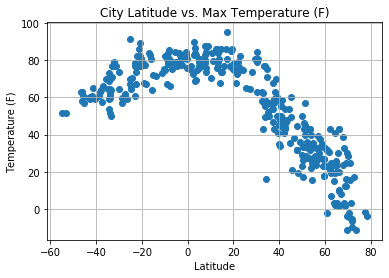

In [10]:
plt.scatter(DataFrame['Lat'], DataFrame["Max Temp"])

plt.title(f'City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)

plt.savefig("C:/Users/User/api-homework/LatitudevsTemperature Plot.png")
plt.show()

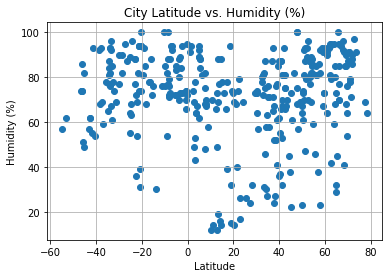

In [11]:
plt.scatter(DataFrame['Lat'], DataFrame['Humidity'])

plt.title(f'City Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.savefig("C:/Users/User/api-homework/LatitudevsHumidity Plot.png")
plt.show()

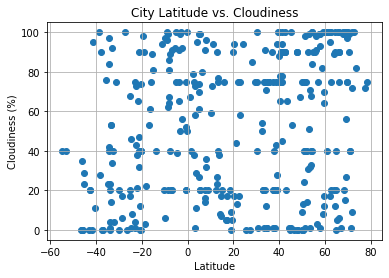

In [12]:
plt.scatter(DataFrame['Lat'], DataFrame['Cloudiness'])

plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

plt.savefig("C:/Users/User/api-homework/LatitudevsCloudiness Plot.png")
plt.show()

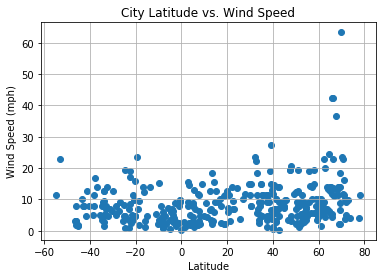

In [13]:
plt.scatter(DataFrame['Lat'], DataFrame['Wind Speed'])

plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

plt.savefig("C:/Users/User/api-homework/LatitudevsWind Speed Plot.png")
plt.show()

In [14]:
def Lin_Reg(latitude, variable):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, variable)
    regress_values = latitude * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(latitude, variable)
    plt.plot(latitude,regress_values,"r-")
    plt.annotate(line_eq,(max(latitude)-6,max(variable)-10),fontsize=15,color="red")
    return rvalue

In [15]:
Northern_Hemisphere_df = DataFrame.loc[(DataFrame["Lat"]>0),:]
Northern_Hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mandalgovi,53.0,MN,1.585610e+09,61.0,45.76,106.27,20.84,9.82
1,hilo,90.0,US,1.585610e+09,73.0,19.73,-155.09,75.20,12.75
2,nanortalik,100.0,GL,1.585610e+09,93.0,60.14,-45.24,33.03,10.04
4,cabo san lucas,75.0,MX,1.585610e+09,26.0,22.89,-109.91,82.40,6.93
5,xianshuigu,94.0,CN,1.585610e+09,61.0,38.98,117.38,50.00,6.71
...,...,...,...,...,...,...,...,...,...
371,santa ana,20.0,US,1.585610e+09,46.0,33.75,-117.87,77.00,9.17
374,abu kamal,12.0,SY,1.585610e+09,58.0,34.45,40.92,58.30,7.87
375,caceres,100.0,ES,1.585610e+09,85.0,39.52,-6.37,41.00,13.00
377,phetchaburi,23.0,TH,1.585610e+09,49.0,12.97,99.58,75.92,3.44


In [16]:
Southern_Hemisphere_df = DataFrame.loc[(DataFrame["Lat"]<0),:]
Southern_Hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
11,bluff,0.0,NZ,1.585610e+09,74.0,-46.60,168.33,63.00,3.00
13,jember,67.0,ID,1.585610e+09,72.0,-8.17,113.70,80.58,0.85
14,punta arenas,40.0,CL,1.585610e+09,62.0,-53.15,-70.92,51.80,23.04
17,hermanus,97.0,ZA,1.585610e+09,84.0,-34.42,19.23,59.00,8.34
18,codrington,28.0,AU,1.585610e+09,68.0,-38.27,141.97,62.78,11.54


The r-squared is: -0.9098463015969058


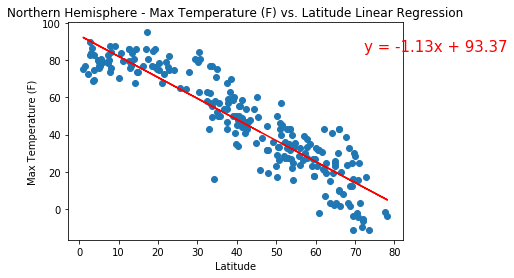

In [17]:
shown_rvalue=Lin_Reg(Northern_Hemisphere_df["Lat"],Northern_Hemisphere_df["Max Temp"])

plt.title('Northern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {shown_rvalue}")
plt.show()

The r-squared is: 0.7473029831183773


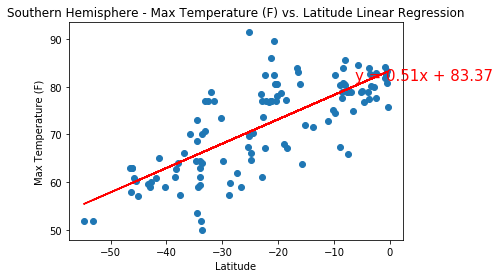

In [18]:
shown_rvalue=Lin_Reg(Southern_Hemisphere_df["Lat"],Southern_Hemisphere_df["Max Temp"])

plt.title('Southern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {shown_rvalue}")
plt.show()

The r-squared is: 0.28589599533942756


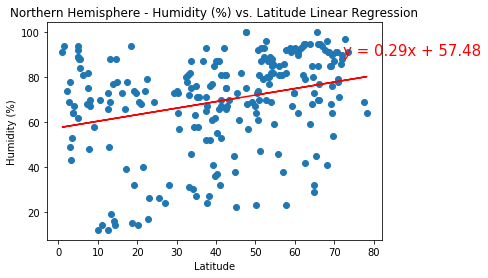

In [19]:
shown_rvalue=Lin_Reg(Northern_Hemisphere_df["Lat"],Northern_Hemisphere_df["Humidity"])

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {shown_rvalue}")
plt.show()

The r-squared is: 0.18901675800304707


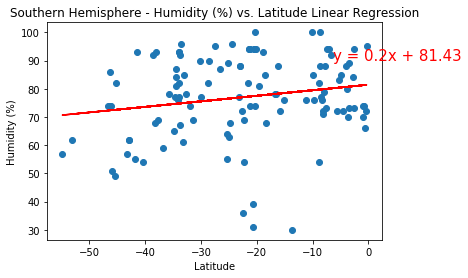

In [20]:
shown_rvalue=Lin_Reg(Southern_Hemisphere_df["Lat"],Southern_Hemisphere_df["Humidity"])

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {shown_rvalue}")
plt.show()

The r-squared is: 0.1828876953191236


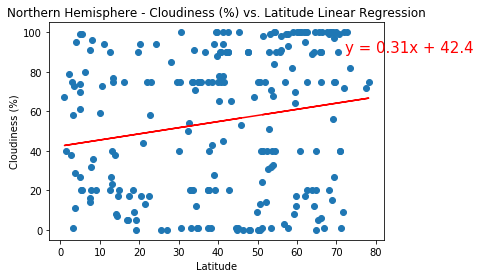

In [21]:
shown_rvalue=Lin_Reg(Northern_Hemisphere_df["Lat"],Northern_Hemisphere_df["Cloudiness"])

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {shown_rvalue}")
plt.show()

The r-squared is: 0.43019995009654616


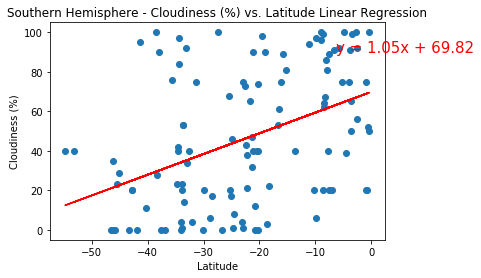

In [22]:
shown_rvalue=Lin_Reg(Southern_Hemisphere_df["Lat"],Southern_Hemisphere_df["Cloudiness"])

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {shown_rvalue}")
plt.show()

The r-squared is: 0.24917304006117882


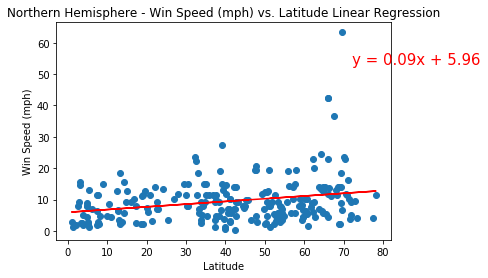

In [23]:
shown_rvalue=Lin_Reg(Northern_Hemisphere_df["Lat"],Northern_Hemisphere_df["Wind Speed"])

plt.title('Northern Hemisphere - Win Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Win Speed (mph)')
print(f"The r-squared is: {shown_rvalue}")
plt.show()

The r-squared is: -0.2308788188860868


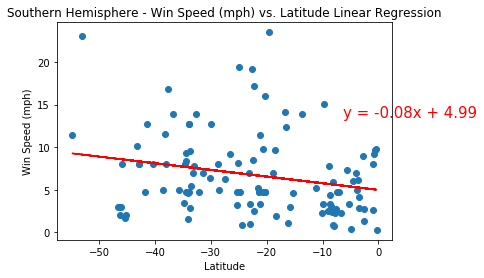

In [24]:
shown_rvalue=Lin_Reg(Southern_Hemisphere_df["Lat"],Southern_Hemisphere_df["Wind Speed"])

plt.title('Southern Hemisphere - Win Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Win Speed (mph)')
print(f"The r-squared is: {shown_rvalue}")
plt.show()